In [34]:
#Use logistic regression to predict Titanic Survivors

In [35]:
# Pick Variables
# Plot Hist of the character variables
# Transform to binary/dummy
# Create a Training Test Set
# Perform Regression
# Assess accuracy through the classification report


In [36]:
import pandas as pd
import seaborn as sns
import math as m
import scipy.stats as st
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [37]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [38]:
df = pd.read_csv('titanic.csv')

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [40]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [41]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

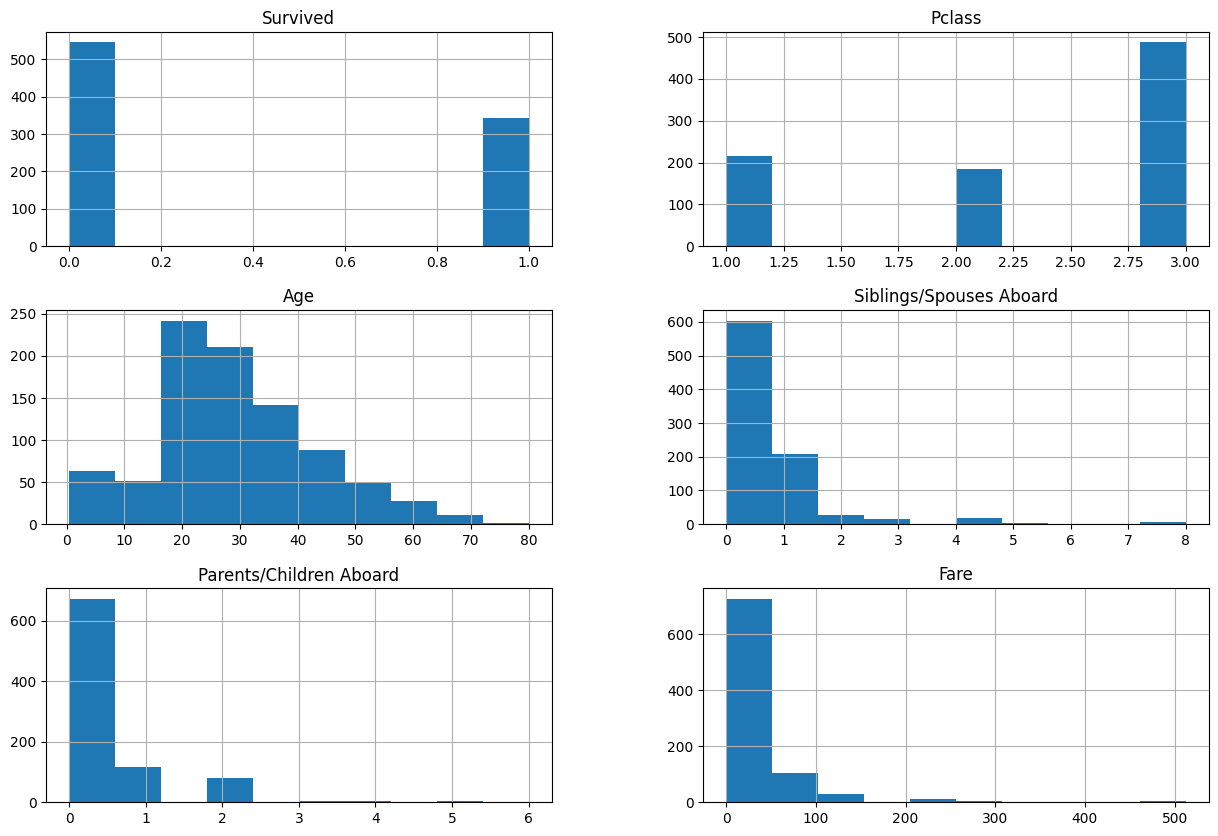

In [42]:
df.hist(figsize=(15,10))
plt.show

In [ ]:
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)
df_excluded = df.drop(columns = ['Name'])

<Axes: >

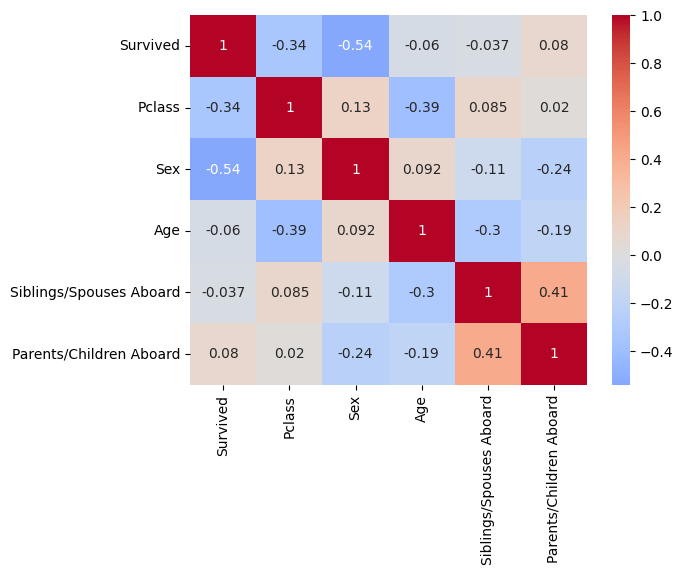

In [62]:
df_excluded = pd.get_dummies(df_excluded, drop_first=True)

sns.heatmap(df_excluded.corr(), annot=True, cmap = 'coolwarm', center = 0)

In [44]:
df_excluded = df_excluded.drop(columns = ['Fare'])

In [45]:
df_excluded.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [46]:
y= df_excluded['Survived']
X= df_excluded.iloc[:, 1:]
X = sm.add_constant(X)

In [48]:
X.head()

,const,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,1.0,3,1,22.0,1,0
1,1.0,1,0,38.0,1,0
2,1.0,3,0,26.0,0,0
3,1.0,1,0,35.0,1,0
4,1.0,3,1,35.0,0,0


In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

In [64]:
model = sm.Logit(y_train, x_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.405327
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.3912
Time:                        11:15:24   Log-Likelihood:                -287.38
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 1.177e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.3907      0.627     10.192      0.000       5.162   

In [51]:
def logistic_reader (coefficient):
  probability = round((np.exp(coefficient) -1) * 100,2)
  if probability > 0:
    print(f"The liklehood increases by {probability} %")
  elif probability == 0:
    print(f"No impact")
  else:
    print(f"The liklehood decreases by {probability} %")

In [60]:
logistic_reader(result.params['Pclass'])

The liklehood decreases by -71.59 %


In [53]:
# predictions
predictions = result.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0])

In [54]:
y_test.mean()

0.37640449438202245

In [55]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print ('True Negatives: ', tn)
print ('False Positives: ', fp)
print ('False Negatives: ', fn)
print ('True Positives: ', tp)

True Negatives:  96
False Positives:  15
False Negatives:  29
True Positives:  38


In [56]:
# Classification report - The details above in a table
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       111
           1       0.72      0.57      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.72      0.72       178
weighted avg       0.75      0.75      0.75       178

